In [ ]:

#Install Java Development kit for Spark
!apt-get install openjdk-8-jdk

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following additional packages will be installed:
  fonts-dejavu-core fonts-dejavu-extra libatk-wrapper-java libatk-wrapper-java-jni libfontenc1
  libgail-common libgail18 libgtk2.0-0 libgtk2.0-bin libgtk2.0-common libice-dev librsvg2-common
  libsm-dev libxkbfile1 libxt-dev libxtst6 libxxf86dga1 openjdk-8-jdk-headless openjdk-8-jre
  openjdk-8-jre-headless x11-utils
Suggested packages:
  gvfs libice-doc libsm-doc libxt-doc openjdk-8-demo openjdk-8-source visualvm libnss-mdns
  fonts-nanum fonts-ipafont-gothic fonts-ipafont-mincho fonts-wqy-microhei fonts-wqy-zenhei
  fonts-indic mesa-utils
The following NEW packages will be installed:
  fonts-dejavu-core fonts-dejavu-extra libatk-wrapper-java libatk-wrapper-java-jni libfontenc1
  libgail-common libgail18 libgtk2.0-0 libgtk2.0-bin libgtk2.0-common libice-dev librsvg2-common
  libsm-dev libxkbfile1 libxt-dev libxtst6 libxxf86dga1 openjdk-

In [ ]:


import os

In [ ]:
os.environ["JAVA_HOME"]="/usr/lib/jvm/java-8-openjdk-amd64"


In [ ]:
!pwd

/content


In [ ]:

!echo $JAVA_HOME

/usr/lib/jvm/java-8-openjdk-amd64


In [ ]:

!pip install pyspark==3.0.0

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 204.7/204.7 MB 4.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 198.6/198.6 kB 27.7 MB/s eta 0:00:00
  Created wheel for pyspark: filename=pyspark-3.0.0-py2.py3-none-any.whl size=205044160 sha256=105cced655f071a9e3dba2f562c0196f3a8e213cffe142b0b37259858f7d1d4e
  Stored in directory: /root/.cache/pip/wheels/b1/bb/8b/ca24d3f756f2ed967225b0871898869db676eb5846df5adc56
Successfully built pyspark
  Attempting uninstall: py4j
    Found existing installation: py4j 0.10.9.7
    Uninstalling py4j-0.10.9.7:
      Successfully uninstalled py4j-0.10.9.7


In [ ]:

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#Create object of spark session
from pyspark.sql import SparkSession
spark = SparkSession.builder.appName('ml-cardio').getOrCreate()


In [ ]:
df=spark.read.csv('/content/drive/MyDrive/Colab Dataset/cardio_train.csv',inferSchema=True,header=True)


In [ ]:

#Check dimension's
print((df.count(),len(df.columns)))


(70000, 13)


In [ ]:
#Check for the schema
df.printSchema()

root
 |-- id: integer (nullable = true)
 |-- age: integer (nullable = true)
 |-- gender: integer (nullable = true)
 |-- height: integer (nullable = true)
 |-- weight: double (nullable = true)
 |-- ap_hi: integer (nullable = true)
 |-- ap_lo: integer (nullable = true)
 |-- cholesterol: integer (nullable = true)
 |-- gluc: integer (nullable = true)
 |-- smoke: integer (nullable = true)
 |-- alco: integer (nullable = true)
 |-- active: integer (nullable = true)
 |-- cardio: integer (nullable = true)



In [ ]:

#Top 5 records
df.show(5)

+---+-----+------+------+------+-----+-----+-----------+----+-----+----+------+------+
| id|  age|gender|height|weight|ap_hi|ap_lo|cholesterol|gluc|smoke|alco|active|cardio|
+---+-----+------+------+------+-----+-----+-----------+----+-----+----+------+------+
|  0|18393|     2|   168|  62.0|  110|   80|          1|   1|    0|   0|     1|     0|
|  1|20228|     1|   156|  85.0|  140|   90|          3|   1|    0|   0|     1|     1|
|  2|18857|     1|   165|  64.0|  130|   70|          3|   1|    0|   0|     0|     1|
|  3|17623|     2|   169|  82.0|  150|  100|          1|   1|    0|   0|     1|     1|
|  4|17474|     1|   156|  56.0|  100|   60|          1|   1|    0|   0|     0|     0|
+---+-----+------+------+------+-----+-----+-----------+----+-----+----+------+------+
only showing top 5 rows



In [ ]:

#Datatypes of the columns
df.dtypes


[('id', 'int'),
 ('age', 'int'),
 ('gender', 'int'),
 ('height', 'int'),
 ('weight', 'double'),
 ('ap_hi', 'int'),
 ('ap_lo', 'int'),
 ('cholesterol', 'int'),
 ('gluc', 'int'),
 ('smoke', 'int'),
 ('alco', 'int'),
 ('active', 'int'),
 ('cardio', 'int')]

In [ ]:
df.describe().show()

+-------+------------------+------------------+-------------------+------------------+------------------+-----------------+------------------+------------------+------------------+-------------------+--------------------+------------------+------------------+
|summary|                id|               age|             gender|            height|            weight|            ap_hi|             ap_lo|       cholesterol|              gluc|              smoke|                alco|            active|            cardio|
+-------+------------------+------------------+-------------------+------------------+------------------+-----------------+------------------+------------------+------------------+-------------------+--------------------+------------------+------------------+
|  count|             70000|             70000|              70000|             70000|             70000|            70000|             70000|             70000|             70000|              70000|               70000

In [ ]:

from pyspark.sql.functions import col
# Filter out rows with non-negative ap_hi and ap_lo values
filtered_df = df.filter((col("ap_hi") >= 60) & (col("ap_lo") >= 30))

# Show the top 5 records of the filtered DataFrame
filtered_df.show(5)

+---+-----+------+------+------+-----+-----+-----------+----+-----+----+------+------+
| id|  age|gender|height|weight|ap_hi|ap_lo|cholesterol|gluc|smoke|alco|active|cardio|
+---+-----+------+------+------+-----+-----+-----------+----+-----+----+------+------+
|  0|18393|     2|   168|  62.0|  110|   80|          1|   1|    0|   0|     1|     0|
|  1|20228|     1|   156|  85.0|  140|   90|          3|   1|    0|   0|     1|     1|
|  2|18857|     1|   165|  64.0|  130|   70|          3|   1|    0|   0|     0|     1|
|  3|17623|     2|   169|  82.0|  150|  100|          1|   1|    0|   0|     1|     1|
|  4|17474|     1|   156|  56.0|  100|   60|          1|   1|    0|   0|     0|     0|
+---+-----+------+------+------+-----+-----+-----------+----+-----+----+------+------+
only showing top 5 rows



In [ ]:
filtered_df.describe().show()

+-------+------------------+------------------+-------------------+------------------+------------------+------------------+-----------------+------------------+------------------+-------------------+-------------------+------------------+-------------------+
|summary|                id|               age|             gender|            height|            weight|             ap_hi|            ap_lo|       cholesterol|              gluc|              smoke|               alco|            active|             cardio|
+-------+------------------+------------------+-------------------+------------------+------------------+------------------+-----------------+------------------+------------------+-------------------+-------------------+------------------+-------------------+
|  count|             69764|             69764|              69764|             69764|             69764|             69764|            69764|             69764|             69764|              69764|              69764|

In [ ]:
# Further filter the data for ap_hi and ap_lo values
filtered_df = filtered_df.filter((col("ap_hi") >= 60) & (col("ap_hi") <= 250) & (col("ap_lo") >= 30) & (col("ap_lo") <= 200))

# Show the top 5 records of the filtered DataFrame
filtered_df.show(5)


+---+-----+------+------+------+-----+-----+-----------+----+-----+----+------+------+
| id|  age|gender|height|weight|ap_hi|ap_lo|cholesterol|gluc|smoke|alco|active|cardio|
+---+-----+------+------+------+-----+-----+-----------+----+-----+----+------+------+
|  0|18393|     2|   168|  62.0|  110|   80|          1|   1|    0|   0|     1|     0|
|  1|20228|     1|   156|  85.0|  140|   90|          3|   1|    0|   0|     1|     1|
|  2|18857|     1|   165|  64.0|  130|   70|          3|   1|    0|   0|     0|     1|
|  3|17623|     2|   169|  82.0|  150|  100|          1|   1|    0|   0|     1|     1|
|  4|17474|     1|   156|  56.0|  100|   60|          1|   1|    0|   0|     0|     0|
+---+-----+------+------+------+-----+-----+-----------+----+-----+----+------+------+
only showing top 5 rows



In [ ]:
filtered_df.describe().show()

+-------+------------------+------------------+------------------+------------------+------------------+------------------+-----------------+------------------+------------------+-------------------+--------------------+------------------+-------------------+
|summary|                id|               age|            gender|            height|            weight|             ap_hi|            ap_lo|       cholesterol|              gluc|              smoke|                alco|            active|             cardio|
+-------+------------------+------------------+------------------+------------------+------------------+------------------+-----------------+------------------+------------------+-------------------+--------------------+------------------+-------------------+
|  count|             68781|             68781|             68781|             68781|             68781|             68781|            68781|             68781|             68781|              68781|               68781|

In [ ]:


#Drop unwanted columns
my_data = filtered_df
my_data.columns

['id',
 'age',
 'gender',
 'height',
 'weight',
 'ap_hi',
 'ap_lo',
 'cholesterol',
 'gluc',
 'smoke',
 'alco',
 'active',
 'cardio']

In [ ]:

cols = filtered_df.columns

In [ ]:
cols

['id',
 'age',
 'gender',
 'height',
 'weight',
 'ap_hi',
 'ap_lo',
 'cholesterol',
 'gluc',
 'smoke',
 'alco',
 'active',
 'cardio']

In [ ]:
from pyspark.sql.functions import col
from pyspark.ml.stat import Correlation
from pyspark.ml.feature import VectorAssembler


In [ ]:

# Select the relevant numerical columns for correlation analysis
numerical_columns = ["age", "height", "weight", "ap_hi", "ap_lo"]

# Create a VectorAssembler to assemble the selected columns into a vector
Corr_assembler = VectorAssembler(inputCols=numerical_columns, outputCol="features")
Corr_assembled_df = Corr_assembler.transform(filtered_df)

# Calculate the correlation matrix
corr_matrix = Correlation.corr(Corr_assembled_df, "features").head()

# Extract the correlation matrix as a DenseMatrix
corr_matrix = corr_matrix[0].toArray()

# Display the correlation matrix
for row in corr_matrix:
    print(row)




[ 1.         -0.08147023  0.05463058  0.2084903   0.15246297]
[-0.08147023  1.          0.2918194   0.01840376  0.03521253]
[0.05463058 0.2918194  1.         0.26917832 0.24862033]
[0.2084903  0.01840376 0.26917832 1.         0.69694463]
[0.15246297 0.03521253 0.24862033 0.69694463 1.        ]


In [ ]:

# import sql function pyspark
import pyspark.sql.functions as f

# null values in each column
data_agg = my_data.agg(*[f.count(f.when(f.isnull(c), c)).alias(c) for c in my_data.columns])
data_agg.show()


+---+---+------+------+------+-----+-----+-----------+----+-----+----+------+------+
| id|age|gender|height|weight|ap_hi|ap_lo|cholesterol|gluc|smoke|alco|active|cardio|
+---+---+------+------+------+-----+-----+-----------+----+-----+----+------+------+
|  0|  0|     0|     0|     0|    0|    0|          0|   0|    0|   0|     0|     0|
+---+---+------+------+------+-----+-----+-----------+----+-----+----+------+------+



In [ ]:

# value counts of columns
my_data.groupBy('cholesterol').count().show()
print()
my_data.groupBy('gender').count().show()
print()
my_data.groupBy('smoke').count().show()
print()
my_data.groupBy('alco').count().show()
print()
my_data.groupBy('active').count().show()
print()


+-----------+-----+
|cholesterol|count|
+-----------+-----+
|          1|51581|
|          3| 7886|
|          2| 9314|
+-----------+-----+


+------+-----+
|gender|count|
+------+-----+
|     1|44795|
|     2|23986|
+------+-----+


+-----+-----+
|smoke|count|
+-----+-----+
|    1| 6053|
|    0|62728|
+-----+-----+


+----+-----+
|alco|count|
+----+-----+
|   1| 3689|
|   0|65092|
+----+-----+


+------+-----+
|active|count|
+------+-----+
|     1|55257|
|     0|13524|
+------+-----+




In [ ]:

my_data.dtypes

[('id', 'int'),
 ('age', 'int'),
 ('gender', 'int'),
 ('height', 'int'),
 ('weight', 'double'),
 ('ap_hi', 'int'),
 ('ap_lo', 'int'),
 ('cholesterol', 'int'),
 ('gluc', 'int'),
 ('smoke', 'int'),
 ('alco', 'int'),
 ('active', 'int'),
 ('cardio', 'int')]

In [ ]:
from pyspark.ml.feature import OneHotEncoder, StringIndexer, VectorAssembler

In [ ]:
# my_data = my_data.withColumnRenamed('cardio', 'label')


In [ ]:

# cols = my_data.columns

In [ ]:
stages=[]
label_stringIdx = StringIndexer(inputCol = 'cardio', outputCol = 'label')
stages += [label_stringIdx]
assembler = VectorAssembler(inputCols=['age',
                                       'gender',
                                       'height',
                                       'weight',
                                       'ap_hi',
                                       'ap_lo',
                                       'cholesterol',
                                       'gluc',
                                       'smoke',
                                       'alco',
                                       'active',
                                      ],
                           outputCol='features')
stages += [assembler]

In [ ]:

from pyspark.ml import Pipeline
pipeline = Pipeline(stages = stages)
pipelineModel = pipeline.fit(my_data)
my_data = pipelineModel.transform(my_data)
selectedCols = ['label', 'features'] + cols
my_data = my_data.select(selectedCols)
my_data.printSchema()


root
 |-- label: double (nullable = false)
 |-- features: vector (nullable = true)
 |-- id: integer (nullable = true)
 |-- age: integer (nullable = true)
 |-- gender: integer (nullable = true)
 |-- height: integer (nullable = true)
 |-- weight: double (nullable = true)
 |-- ap_hi: integer (nullable = true)
 |-- ap_lo: integer (nullable = true)
 |-- cholesterol: integer (nullable = true)
 |-- gluc: integer (nullable = true)
 |-- smoke: integer (nullable = true)
 |-- alco: integer (nullable = true)
 |-- active: integer (nullable = true)
 |-- cardio: integer (nullable = true)



In [ ]:

my_data.toPandas().head(5)

,label,features,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0.0,"[18393.0, 2.0, 168.0, 62.0, 110.0, 80.0, 1.0, ...",0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1.0,"[20228.0, 1.0, 156.0, 85.0, 140.0, 90.0, 3.0, ...",1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,1.0,"[18857.0, 1.0, 165.0, 64.0, 130.0, 70.0, 3.0, ...",2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,1.0,"[17623.0, 2.0, 169.0, 82.0, 150.0, 100.0, 1.0,...",3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,0.0,"[17474.0, 1.0, 156.0, 56.0, 100.0, 60.0, 1.0, ...",4,17474,1,156,56.0,100,60,1,1,0,0,0,0


In [ ]:
train_df, test_df = my_data.randomSplit([0.7, 0.3], seed = 2018)
print("Training Dataset Count: " + str(train_df.count()))
print("Test Dataset Count: " + str(test_df.count()))


Training Dataset Count: 48144
Test Dataset Count: 20637


In [ ]:
from pyspark.ml.classification import LogisticRegression
lr = LogisticRegression(featuresCol = 'features', labelCol = 'label', maxIter=10)
lrModel = lr.fit(train_df)


In [ ]:

# # Define all the feature columns, including "bmi"
# bselected_features = ["age", "gender", "height", "weight", "ap_hi", "ap_lo", "cholesterol", "gluc", "smoke", "alco", "active", "bmi"]


In [ ]:
# # Import the Random Forest model
# from pyspark.ml.classification import RandomForestClassifier

# # Initialize and train a Random Forest model
# rf = RandomForestClassifier(featuresCol="features", labelCol="cardio")
# rf_model = rf.fit(train_df)

# # Get feature importance scores
# feature_importance = rf_model.featureImportances

# # Print feature importance scores
# print("Feature Importance Scores:")
# for feature, importance in zip(bselected_features, feature_importance):
#     print(f"{feature}: {importance:.4f}")


Feature Importance Scores:
age: 0.0817
gender: 0.0003
height: 0.0013
weight: 0.0157
ap_hi: 0.5448
ap_lo: 0.2651
cholesterol: 0.0849
gluc: 0.0030
smoke: 0.0007
alco: 0.0000
active: 0.0025


In [ ]:
# from pyspark.ml.evaluation import MulticlassClassificationEvaluator
# features= ["age", "gender", "height", "weight", "ap_hi", "ap_lo", "cholesterol"]
# # Initialize and train a Random Forest model
# rf = RandomForestClassifier(featuresCol="features", labelCol="cardio")
# rf_model = rf.fit(train_df)
# # Assuming you have a test dataset named test_df

# # Make predictions on the test set
# predictions = rf_model.transform(test_df)

# # Evaluate the accuracy
# evaluator = MulticlassClassificationEvaluator(
#     labelCol="cardio",
#     predictionCol="prediction",
#     metricName="accuracy"
# )

# accuracy = evaluator.evaluate(predictions)

# # Print the accuracy
# print(f"Accuracy: {accuracy:.4f}")


Accuracy: 0.7273


In [ ]:
lr_summary=lrModel.summary

In [ ]:

#Overall accuracy of the classification model
lr_summary.accuracy

0.7031405782652044

In [ ]:
#Area under ROC
lr_summary.areaUnderROC

0.7592923655847733

In [ ]:

#Precision of both classes
print(lr_summary.precisionByLabel)

[0.6949817447370465, 0.7125189749084739]


In [ ]:

#Recall of both classes
print(lr_summary.recallByLabel)

[0.7353690613184284, 0.6702082983369729]


In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

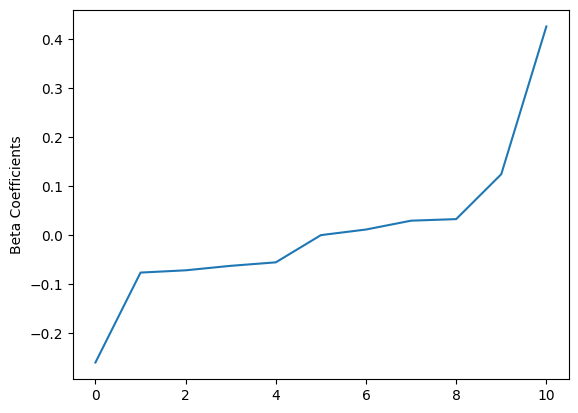

In [ ]:
beta = np.sort(lrModel.coefficients)
plt.plot(beta)
plt.ylabel('Beta Coefficients')
plt.show()


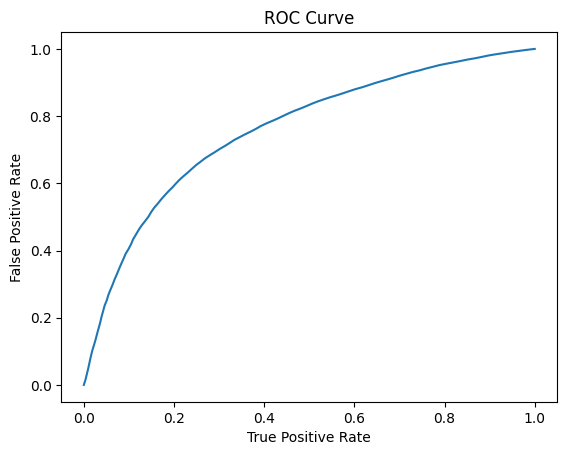

Training set areaUnderROC: 0.7592923655847733


In [ ]:
trainingSummary = lrModel.summary
roc = trainingSummary.roc.toPandas()
plt.plot(roc['FPR'],roc['TPR'])
plt.ylabel('False Positive Rate')
plt.xlabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()
print('Training set areaUnderROC: ' + str(trainingSummary.areaUnderROC))

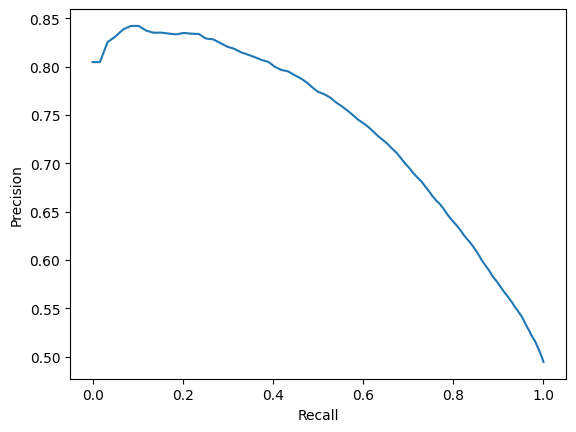

In [ ]:
pr = trainingSummary.pr.toPandas()
plt.plot(pr['recall'],pr['precision'])
plt.ylabel('Precision')
plt.xlabel('Recall')
plt.show()

In [ ]:
predictions = lrModel.transform(test_df)
predictions.select('label','rawPrediction','probability','prediction').toPandas().head(20)


,label,rawPrediction,probability,prediction
0,0.0,"[2.7609354959264922, -2.7609354959264922]","[0.9405279826481115, 0.05947201735188847]",0.0
1,0.0,"[1.2909963836232663, -1.2909963836232663]","[0.7843157896950256, 0.2156842103049744]",0.0
2,0.0,"[-0.20281332798923968, 0.20281332798923968]","[0.4494697554583629, 0.5505302445416372]",1.0
3,0.0,"[1.5201290589698297, -1.5201290589698297]","[0.820557484395735, 0.17944251560426508]",0.0
4,0.0,"[1.6068119127094245, -1.6068119127094245]","[0.8329682918261581, 0.16703170817384186]",0.0
5,0.0,"[0.2918351481776069, -0.2918351481776069]","[0.5724453481116716, 0.4275546518883285]",0.0
6,0.0,"[2.77338059825751, -2.77338059825751]","[0.9412202961619659, 0.05877970383803404]",0.0
7,0.0,"[2.08521586773151, -2.08521586773151]","[0.8894579133304661, 0.11054208666953397]",0.0
8,0.0,"[-0.03915348119993388, 0.03915348119993388]","[0.49021287996865215, 0.5097871200313479]",1.0
9,0.0,"[0.40763479523296287, -0.40763479523296287]","[0.6005206117492572, 0.39947938825074275]",0.0


In [ ]:
predictions.select('label','prediction').toPandas().head(20)

,label,prediction
0,0.0,0.0
1,0.0,0.0
2,0.0,1.0
3,0.0,0.0
4,0.0,0.0
5,0.0,0.0
6,0.0,0.0
7,0.0,0.0
8,0.0,1.0
9,0.0,0.0


In [ ]:
#Evaluate our Logistic Regression model.
from pyspark.ml.evaluation import BinaryClassificationEvaluator
evaluator = BinaryClassificationEvaluator()
print('Test Area Under ROC', evaluator.evaluate(predictions))

Test Area Under ROC 0.7622873618401208


In [ ]:

from pyspark.ml.tuning import ParamGridBuilder, CrossValidator

# Create ParamGrid for Cross Validation
paramGrid = (ParamGridBuilder()
             .addGrid(lr.regParam, [0.01, 0.5, 2.0])
             .addGrid(lr.elasticNetParam, [0.0, 0.5, 1.0])
             .addGrid(lr.maxIter, [1, 5, 10])
             .build())

cv = CrossValidator(estimator=lr, estimatorParamMaps=paramGrid, evaluator=evaluator, numFolds=5)

cvModel = cv.fit(train_df)
predictions = cvModel.transform(test_df)
print('Test Area Under ROC', evaluator.evaluate(predictions))

Test Area Under ROC 0.782815740965718


In [ ]:
from pyspark.ml.evaluation import MulticlassClassificationEvaluator

# GBTClassifier model evaluation
predictions = cvModel.transform(test_df)

# Define the evaluators
evaluator_accuracy = MulticlassClassificationEvaluator(
    labelCol="label", predictionCol="prediction", metricName="accuracy"
)

evaluator_f1 = MulticlassClassificationEvaluator(
    labelCol="label", predictionCol="prediction", metricName="f1"
)

evaluator_recall = MulticlassClassificationEvaluator(
    labelCol="label", predictionCol="prediction", metricName="weightedRecall"
)

# Calculate accuracy, F1 score, and recall
accuracy = evaluator_accuracy.evaluate(predictions)
f1 = evaluator_f1.evaluate(predictions)
recall = evaluator_recall.evaluate(predictions)

# Print the results
print("Accuracy: {:.2f}".format(accuracy))
print("F1 Score: {:.2f}".format(f1))
print("Recall: {:.2f}".format(recall))


Accuracy: 0.50
F1 Score: 0.33
Recall: 0.50


In [ ]:

evaluator.getMetricName()

'areaUnderROC'

In [ ]:
#Decision Tree Classifier
from pyspark.ml.classification import DecisionTreeClassifier
dt = DecisionTreeClassifier(featuresCol = 'features', labelCol = 'label', maxDepth = 3)
dtModel = dt.fit(train_df)
predictions = dtModel.transform(test_df)
predictions.select('age', 'gender', 'label', 'rawPrediction', 'prediction', 'probability').show(10)

+-----+------+-----+----------------+----------+--------------------+
|  age|gender|label|   rawPrediction|prediction|         probability|
+-----+------+-----+----------------+----------+--------------------+
|10798|     2|  0.0|[13367.0,3907.0]|       0.0|[0.77382192891050...|
|14292|     2|  0.0|[13367.0,3907.0]|       0.0|[0.77382192891050...|
|14295|     1|  0.0|[4721.0,14677.0]|       1.0|[0.24337560573254...|
|14296|     2|  0.0|[13367.0,3907.0]|       0.0|[0.77382192891050...|
|14302|     1|  0.0|[13367.0,3907.0]|       0.0|[0.77382192891050...|
|14305|     2|  0.0|[4721.0,14677.0]|       1.0|[0.24337560573254...|
|14308|     1|  0.0|[13367.0,3907.0]|       0.0|[0.77382192891050...|
|14313|     1|  0.0|[13367.0,3907.0]|       0.0|[0.77382192891050...|
|14314|     2|  0.0|   [342.0,453.0]|       1.0|[0.43018867924528...|
|14315|     1|  0.0|[13367.0,3907.0]|       0.0|[0.77382192891050...|
+-----+------+-----+----------------+----------+--------------------+
only showing top 10 

In [ ]:
# Get the decision tree rules
tree_rules = dtModel.toDebugString


In [ ]:
def pretty_print_tree_rules(tree_rules):
    lines = tree_rules.split('\n')
    for line in lines:
        depth = line.count('|')
        indentation = '  ' * depth
        print(indentation + line)

pretty_print_tree_rules(tree_rules)


DecisionTreeClassificationModel: uid=DecisionTreeClassifier_2b25d4b81783, depth=3, numNodes=9, numClasses=2, numFeatures=11
  If (feature 4 <= 129.5)
   If (feature 0 <= 20217.5)
    If (feature 6 <= 2.5)
     Predict: 0.0
    Else (feature 6 > 2.5)
     Predict: 1.0
   Else (feature 0 > 20217.5)
    If (feature 6 <= 2.5)
     Predict: 0.0
    Else (feature 6 > 2.5)
     Predict: 1.0
  Else (feature 4 > 129.5)
   Predict: 1.0



In [ ]:

#Evaluate our Random Forest model.
evaluator = BinaryClassificationEvaluator()
print("Test Area Under ROC: " + str(evaluator.evaluate(predictions, {evaluator.metricName: "areaUnderROC"})))

Test Area Under ROC: 0.724580073883146


In [ ]:

# Define the parameter grid for hyperparameter tuning
paramGrid = (ParamGridBuilder()
             .addGrid(dt.maxDepth, [4, 8, 16])
             .addGrid(dt.maxBins, [20, 60])
             .build())

# Create a cross-validator
cv = CrossValidator(estimator=dt, estimatorParamMaps=paramGrid, evaluator=BinaryClassificationEvaluator(), numFolds=5)

# Run cross-validation
cvModel = cv.fit(train_df)

# Make predictions on the test data
predictions = cvModel.transform(test_df)

# Evaluate the model
evaluator = BinaryClassificationEvaluator()
areaUnderROC = evaluator.evaluate(predictions)

print("Decision Tree AUC:", areaUnderROC)

Decision Tree AUC: 0.6665351017081461


In [ ]:
from pyspark.ml.evaluation import MulticlassClassificationEvaluator

# GBTClassifier model evaluation
predictions = cvModel.transform(test_df)

# Define the evaluators
evaluator_accuracy = MulticlassClassificationEvaluator(
    labelCol="label", predictionCol="prediction", metricName="accuracy"
)

evaluator_f1 = MulticlassClassificationEvaluator(
    labelCol="label", predictionCol="prediction", metricName="f1"
)

evaluator_recall = MulticlassClassificationEvaluator(
    labelCol="label", predictionCol="prediction", metricName="weightedRecall"
)

# Calculate accuracy, F1 score, and recall
accuracy = evaluator_accuracy.evaluate(predictions)
f1 = evaluator_f1.evaluate(predictions)
recall = evaluator_recall.evaluate(predictions)

# Print the results
print("Accuracy: {:.2f}".format(accuracy))
print("F1 Score: {:.2f}".format(f1))
print("Recall: {:.2f}".format(recall))


Accuracy: 0.73
F1 Score: 0.73
Recall: 0.73


In [ ]:

#Random Forest Classifier
from pyspark.ml.classification import RandomForestClassifier
rf = RandomForestClassifier(featuresCol = 'features', labelCol = 'label')
rfModel = rf.fit(train_df)
# num_trees = 100
# rf = rf.setNumTrees(num_trees)  # Set the number of trees

predictions = rfModel.transform(test_df)
predictions.select('age', 'gender', 'label', 'rawPrediction', 'prediction', 'probability').show(10)

+-----+------+-----+--------------------+----------+--------------------+
|  age|gender|label|       rawPrediction|prediction|         probability|
+-----+------+-----+--------------------+----------+--------------------+
|10798|     2|  0.0|[15.3158176244402...|       0.0|[0.76579088122201...|
|14292|     2|  0.0|[15.2704651414291...|       0.0|[0.76352325707145...|
|14295|     1|  0.0|[8.18738240572751...|       1.0|[0.40936912028637...|
|14296|     2|  0.0|[15.3075869173933...|       0.0|[0.76537934586966...|
|14302|     1|  0.0|[15.7832574157316...|       0.0|[0.78916287078658...|
|14305|     2|  0.0|[3.60995787587888...|       1.0|[0.18049789379394...|
|14308|     1|  0.0|[15.7832574157316...|       0.0|[0.78916287078658...|
|14313|     1|  0.0|[15.5782360003043...|       0.0|[0.77891180001521...|
|14314|     2|  0.0|[11.1210124274825...|       0.0|[0.55605062137412...|
|14315|     1|  0.0|[14.7568785864992...|       0.0|[0.73784392932496...|
+-----+------+-----+------------------

In [ ]:
# Get the decision tree rules
tree_rules = rfModel.toDebugString


In [ ]:
def pretty_print_tree_rules(tree_rules):
    lines = tree_rules.split('\n')
    for line in lines:
        depth = line.count('|')
        indentation = '  ' * depth
        print(indentation + line)

pretty_print_tree_rules(tree_rules)


RandomForestClassificationModel: uid=RandomForestClassifier_0debb113b69e, numTrees=20, numClasses=2, numFeatures=11
  Tree 0 (weight 1.0):
    If (feature 6 <= 1.5)
     If (feature 4 <= 139.5)
      If (feature 8 <= 0.5)
       If (feature 5 <= 73.5)
        If (feature 4 <= 124.5)
         Predict: 0.0
        Else (feature 4 > 124.5)
         Predict: 1.0
       Else (feature 5 > 73.5)
        Predict: 0.0
      Else (feature 8 > 0.5)
       Predict: 0.0
     Else (feature 4 > 139.5)
      If (feature 4 <= 149.5)
       If (feature 0 <= 22422.0)
        Predict: 1.0
       Else (feature 0 > 22422.0)
        If (feature 2 <= 180.5)
         Predict: 1.0
        Else (feature 2 > 180.5)
         Predict: 0.0
      Else (feature 4 > 149.5)
       If (feature 5 <= 69.5)
        If (feature 3 <= 64.75)
         Predict: 1.0
        Else (feature 3 > 64.75)
         Predict: 0.0
       Else (feature 5 > 69.5)
        Predict: 1.0
    Else (feature 6 > 1.5)
     If (feature 4 <= 129.5)
   

In [ ]:
#Evaluate our  model.
evaluator = BinaryClassificationEvaluator()
print("Test Area Under ROC: " + str(evaluator.evaluate(predictions, {evaluator.metricName: "areaUnderROC"})))

Test Area Under ROC: 0.7925981821408202


In [ ]:
# Define the parameter grid for hyperparameter tuning
paramGrid = (ParamGridBuilder()
             .addGrid(rf.numTrees, [10, 20, 30])
             .addGrid(rf.maxDepth, [4, 8, 16])
             .build())

# Create a cross-validator
cv = CrossValidator(estimator=rf, estimatorParamMaps=paramGrid, evaluator=BinaryClassificationEvaluator(), numFolds=5)

# Run cross-validation
cvModel = cv.fit(train_df)

# Make predictions on the test data
predictions = cvModel.transform(test_df)

# Evaluate the model
evaluator = BinaryClassificationEvaluator()
areaUnderROC = evaluator.evaluate(predictions)

print("Random Forest AUC:", areaUnderROC)

Random Forest AUC: 0.7989595132788171


In [ ]:
from pyspark.ml.evaluation import MulticlassClassificationEvaluator

predictions = cvModel.transform(test_df)

# Define the evaluators
evaluator_accuracy = MulticlassClassificationEvaluator(
    labelCol="label", predictionCol="prediction", metricName="accuracy"
)

evaluator_f1 = MulticlassClassificationEvaluator(
    labelCol="label", predictionCol="prediction", metricName="f1"
)

evaluator_recall = MulticlassClassificationEvaluator(
    labelCol="label", predictionCol="prediction", metricName="weightedRecall"
)

# Calculate accuracy, F1 score, and recall
accuracy = evaluator_accuracy.evaluate(predictions)
f1 = evaluator_f1.evaluate(predictions)
recall = evaluator_recall.evaluate(predictions)

# Print the results
print("Accuracy: {:.2f}".format(accuracy))
print("F1 Score: {:.2f}".format(f1))
print("Recall: {:.2f}".format(recall))


Accuracy: 0.73
F1 Score: 0.73
Recall: 0.73


In [ ]:
#Gradient-Boosted Tree Classifier
from pyspark.ml.classification import GBTClassifier
gbt = GBTClassifier(maxIter=10)
gbtModel = gbt.fit(train_df)
predictions = gbtModel.transform(test_df)
predictions.select('age', 'gender', 'label', 'rawPrediction', 'prediction', 'probability').show(10)

+-----+------+-----+--------------------+----------+--------------------+
|  age|gender|label|       rawPrediction|prediction|         probability|
+-----+------+-----+--------------------+----------+--------------------+
|10798|     2|  0.0|[0.87750509035102...|       0.0|[0.85258361851020...|
|14292|     2|  0.0|[0.63194705473354...|       0.0|[0.77969572861077...|
|14295|     1|  0.0|[-0.1062743536581...|       1.0|[0.44706197150604...|
|14296|     2|  0.0|[0.86578737536844...|       0.0|[0.84961373731977...|
|14302|     1|  0.0|[1.06910449783597...|       0.0|[0.89456180052079...|
|14305|     2|  0.0|[-0.7957922215460...|       1.0|[0.16916109365454...|
|14308|     1|  0.0|[1.06910449783597...|       0.0|[0.89456180052079...|
|14313|     1|  0.0|[0.98285828914894...|       0.0|[0.87715028683931...|
|14314|     2|  0.0|[0.36847592920485...|       0.0|[0.67632895231366...|
|14315|     1|  0.0|[0.88081654514279...|       0.0|[0.85341407526384...|
+-----+------+-----+------------------

In [ ]:
# Get the decision tree rules
tree_rules = gbtModel.toDebugString


In [ ]:
def pretty_print_tree_rules(tree_rules):
    lines = tree_rules.split('\n')
    for line in lines:
        depth = line.count('|')
        indentation = '  ' * depth
        print(indentation + line)

pretty_print_tree_rules(tree_rules)


GBTClassificationModel: uid = GBTClassifier_72bf83f7b0ad, numTrees=10, numClasses=2, numFeatures=11
  Tree 0 (weight 1.0):
    If (feature 4 <= 129.5)
     If (feature 0 <= 19831.5)
      If (feature 6 <= 2.5)
       If (feature 0 <= 16064.5)
        If (feature 6 <= 1.5)
         Predict: -0.753437876960193
        Else (feature 6 > 1.5)
         Predict: -0.4724770642201835
       Else (feature 0 > 16064.5)
        If (feature 4 <= 119.5)
         Predict: -0.6076865485400549
        Else (feature 4 > 119.5)
         Predict: -0.4321853475266124
      Else (feature 6 > 2.5)
       If (feature 7 <= 2.5)
        If (feature 3 <= 52.5)
         Predict: -0.3333333333333333
        Else (feature 3 > 52.5)
         Predict: 0.5192307692307693
       Else (feature 7 > 2.5)
        If (feature 3 <= 80.25)
         Predict: -0.19637462235649547
        Else (feature 3 > 80.25)
         Predict: 0.3023255813953488
     Else (feature 0 > 19831.5)
      If (feature 6 <= 2.5)
       If (feature 

In [ ]:
#Evaluate our Gradient-Boosted Tree Classifier.
evaluator = BinaryClassificationEvaluator()
print("Test Area Under ROC: " + str(evaluator.evaluate(predictions, {evaluator.metricName: "areaUnderROC"})))

Test Area Under ROC: 0.7978115537932278


In [ ]:

print(gbt.explainParams())

cacheNodeIds: If false, the algorithm will pass trees to executors to match instances with nodes. If true, the algorithm will cache node IDs for each instance. Caching can speed up training of deeper trees. Users can set how often should the cache be checkpointed or disable it by setting checkpointInterval. (default: False)
checkpointInterval: set checkpoint interval (>= 1) or disable checkpoint (-1). E.g. 10 means that the cache will get checkpointed every 10 iterations. Note: this setting will be ignored if the checkpoint directory is not set in the SparkContext. (default: 10)
featureSubsetStrategy: The number of features to consider for splits at each tree node. Supported options: 'auto' (choose automatically for task: If numTrees == 1, set to 'all'. If numTrees > 1 (forest), set to 'sqrt' for classification and to 'onethird' for regression), 'all' (use all features), 'onethird' (use 1/3 of the features), 'sqrt' (use sqrt(number of features)), 'log2' (use log2(number of features)), 

In [ ]:

from pyspark.ml.tuning import ParamGridBuilder, CrossValidator
paramGrid = (ParamGridBuilder()
             .addGrid(gbt.maxDepth, [2, 4, 8])
             .addGrid(gbt.maxBins, [20, 60])
             .addGrid(gbt.maxIter, [10, 20])
             .build())
cv = CrossValidator(estimator=gbt, estimatorParamMaps=paramGrid, evaluator=evaluator, numFolds=5)
# Run cross validations.  This can take about 6 minutes since it is training over 20 trees!
cvModel = cv.fit(train_df)
predictions = cvModel.transform(test_df)
evaluator.evaluate(predictions)

0.8007439552945459

In [ ]:
from pyspark.ml.evaluation import MulticlassClassificationEvaluator

# GBTClassifier model evaluation
predictions = cvModel.transform(test_df)

# Define the evaluators
evaluator_accuracy = MulticlassClassificationEvaluator(
    labelCol="label", predictionCol="prediction", metricName="accuracy"
)

evaluator_f1 = MulticlassClassificationEvaluator(
    labelCol="label", predictionCol="prediction", metricName="f1"
)

evaluator_recall = MulticlassClassificationEvaluator(
    labelCol="label", predictionCol="prediction", metricName="weightedRecall"
)

# Calculate accuracy, F1 score, and recall
accuracy = evaluator_accuracy.evaluate(predictions)
f1 = evaluator_f1.evaluate(predictions)
recall = evaluator_recall.evaluate(predictions)

# Print the results
print("Accuracy: {:.2f}".format(accuracy))
print("F1 Score: {:.2f}".format(f1))
print("Recall: {:.2f}".format(recall))


In [ ]:

from pyspark.ml.tuning import ParamGridBuilder, CrossValidator
paramGrid = (ParamGridBuilder()
             .addGrid(gbt.maxDepth, [2, 4, 6])
             .addGrid(gbt.maxBins, [20, 60])
             .addGrid(gbt.maxIter, [10, 20])
             .build())
cv = CrossValidator(estimator=gbt, estimatorParamMaps=paramGrid, evaluator=evaluator, numFolds=10)
# Run cross validations.  This can take about 6 minutes since it is training over 20 trees!
cvModel = cv.fit(train_df)
predictions = cvModel.transform(test_df)
evaluator.evaluate(predictions)

KeyboardInterrupt: ignored

In [ ]:
from pyspark.ml.evaluation import MulticlassClassificationEvaluator

# GBTClassifier model evaluation
predictions = cvModel.transform(test_df)

# Define the evaluators
evaluator_accuracy = MulticlassClassificationEvaluator(
    labelCol="label", predictionCol="prediction", metricName="accuracy"
)

evaluator_f1 = MulticlassClassificationEvaluator(
    labelCol="label", predictionCol="prediction", metricName="f1"
)

evaluator_recall = MulticlassClassificationEvaluator(
    labelCol="label", predictionCol="prediction", metricName="weightedRecall"
)

# Calculate accuracy, F1 score, and recall
accuracy = evaluator_accuracy.evaluate(predictions)
f1 = evaluator_f1.evaluate(predictions)
recall = evaluator_recall.evaluate(predictions)

# Print the results
print("Accuracy: {:.2f}".format(accuracy))
print("F1 Score: {:.2f}".format(f1))
print("Recall: {:.2f}".format(recall))


Accuracy: 0.74
F1 Score: 0.74
Recall: 0.74


In [ ]:

#Get Preditions
predictions = log_reg.transform(test_df)

In [ ]:

predictions.select('label','prediction').show(50)

In [ ]:
from pyspark.ml.classification import LinearSVC
from pyspark.ml.evaluation import BinaryClassificationEvaluator
from pyspark.ml.tuning import ParamGridBuilder, CrossValidator
from pyspark.ml.feature import VectorAssembler

# Define the SVM classifier
svm = LinearSVC(featuresCol='features', labelCol='label')

# Define the parameter grid for hyperparameter tuning
paramGrid = (ParamGridBuilder()
             .addGrid(svm.regParam, [0.01, 0.1, 1.0])
             .addGrid(svm.maxIter, [10, 20, 30])
             .build())

# Create a cross-validator
cv = CrossValidator(estimator=svm, estimatorParamMaps=paramGrid, evaluator=BinaryClassificationEvaluator(), numFolds=5)

# Run cross-validation on the training data
cvModel = cv.fit(train_df)



IllegalArgumentException: ignored

In [ ]:

# Make predictions on the test data
predictions = cvModel.transform(test_df)

# Evaluate the model
evaluator = BinaryClassificationEvaluator()
areaUnderROC = evaluator.evaluate(predictions, {evaluator.metricName: "areaUnderROC"})
print("SVM AUC:", areaUnderROC)

# Additional evaluation metrics if needed
accuracy = evaluator.evaluate(predictions, {evaluator.metricName: "accuracy"})
f1 = evaluator.evaluate(predictions, {evaluator.metricName: "f1"})
recall = evaluator.evaluate(predictions, {evaluator.metricName: "weightedRecall"})

# Print the results
print("Accuracy: {:.2f}".format(accuracy))
print("F1 Score: {:.2f}".format(f1))
print("Recall: {:.2f}".format(recall))


SVM AUC: 0.7597969954928673


IllegalArgumentException: ignored